In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

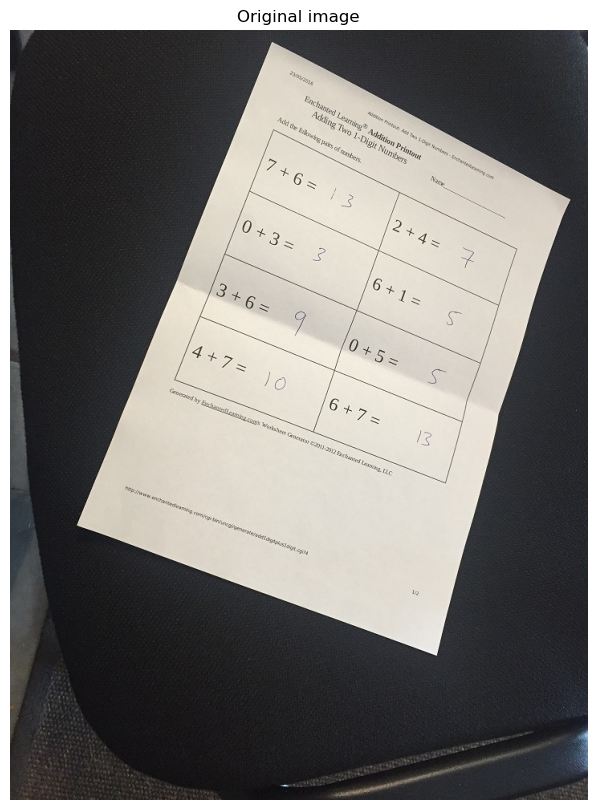

In [3]:
image = cv2.imread("scan.jpg")
imshow('Original image', image)

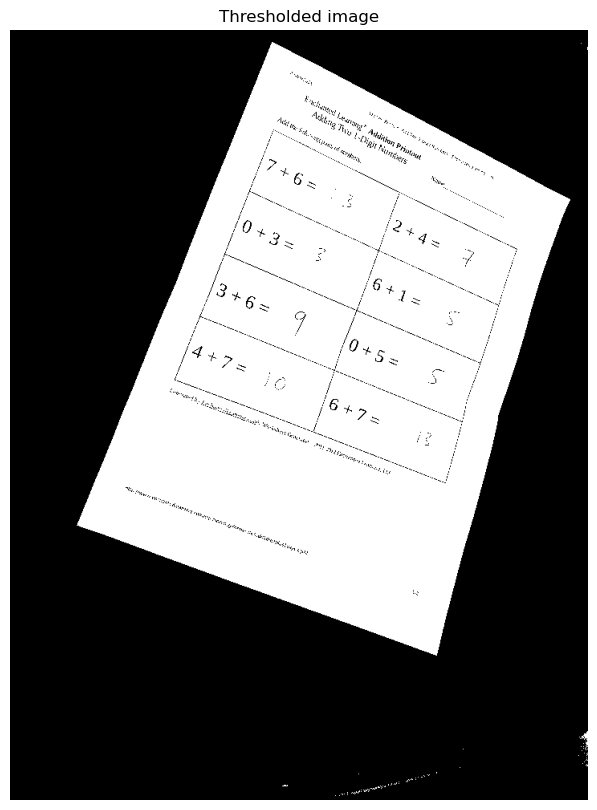

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Thresholded image', th2)

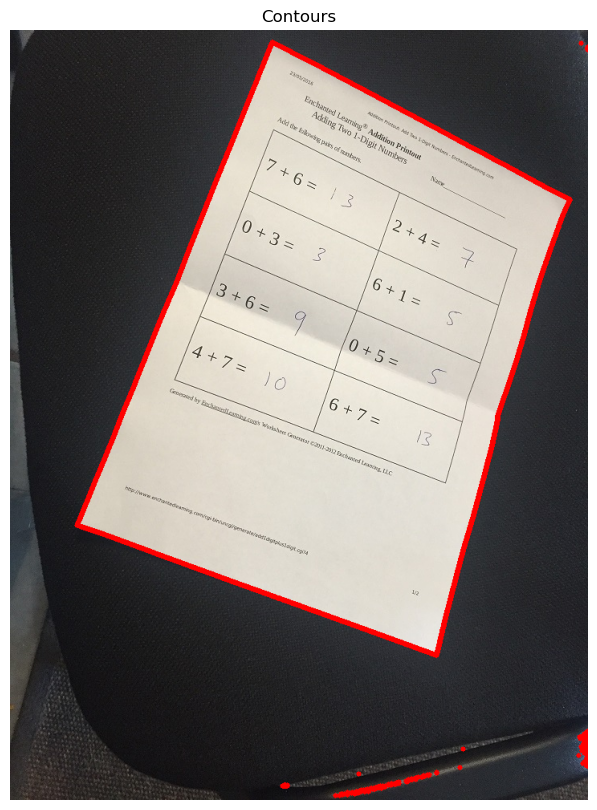

In [11]:
# find contours alters image so we need to make a copy
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imshow('Contours', cv2.drawContours(image.copy(), contours, -1, (0, 0, 255), 5))


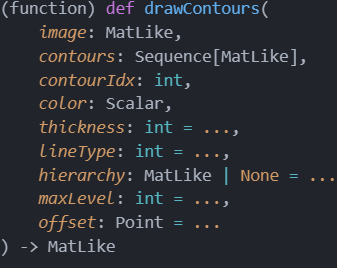

In [12]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 54


In [19]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

for cnt in sorted_contours:
    perimateter = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.05 * perimateter, True)
    
    if len(approx) == 4:
        break
print('Our 4 corner points are: ', approx)

Our 4 corner points are:  [[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


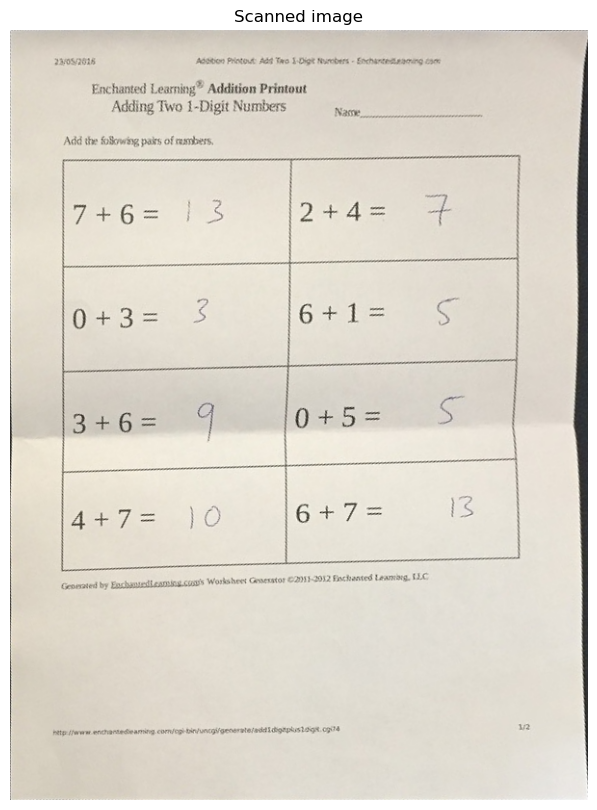

In [22]:
input_pts = np.float32(approx)

output_pts = np.float32([[0,0],
                       [0,800],
                       [600,800],
                       [600,0]])

m = cv2.getPerspectiveTransform(input_pts, output_pts)
dst = cv2.warpPerspective(image, m, (600, 800))
imshow('Scanned image', dst)    